# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

At this project we try to scrap Data Exchange Rate between the Indonesian Rupiah (IDR) and the US Dollar (USD) from **exchange-rates.org** website. We will try to scrap this sites for educational purpose only.

We will scrap 2 points from this sites. One is periode date. The other one is exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD).

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/6/2022
    </td>
    <td>
     Wednesday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-6-2022">
      14,996.82520
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-6-2022">
      USD IDR rate for 7/6/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     7/5/2022
    </td>
    <td


Finding row length.

In [5]:
row = table.find_all('tr')
row_length = len(row)
row_length

129

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    
    #get date 
    period_date = table.find_all('tr')[i].find_all('td')[0].text
    
    #get price daily
    price_daily = table.find_all('tr')[i].find_all('td')[2].text
    price_daily = price_daily.replace('IDR','').strip() #to remove word "IDR" & excess white space
    
    temp.append((period_date,price_daily)) 
    
temp

[('7/6/2022', '14,996.82520'),
 ('7/5/2022', '15,014.65000'),
 ('7/4/2022', '14,994.55000'),
 ('7/1/2022', '14,975.15000'),
 ('6/30/2022', '14,928.80000'),
 ('6/29/2022', '14,868.90000'),
 ('6/28/2022', '14,852.35000'),
 ('6/27/2022', '14,807.70000'),
 ('6/24/2022', '14,829.50000'),
 ('6/23/2022', '14,848.80000'),
 ('6/22/2022', '14,833.90000'),
 ('6/21/2022', '14,833.60000'),
 ('6/20/2022', '14,827.75000'),
 ('6/17/2022', '14,838.85000'),
 ('6/16/2022', '14,809.20000'),
 ('6/15/2022', '14,695.10000'),
 ('6/14/2022', '14,764.20000'),
 ('6/13/2022', '14,782.80000'),
 ('6/10/2022', '14,614.95000'),
 ('6/9/2022', '14,611.85000'),
 ('6/8/2022', '14,513.20000'),
 ('6/7/2022', '14,465.30000'),
 ('6/6/2022', '14,437.70000'),
 ('6/3/2022', '14,433.50000'),
 ('6/2/2022', '14,435.00000'),
 ('6/1/2022', '14,555.60000'),
 ('5/31/2022', '14,580.63428'),
 ('5/30/2022', '14,538.55000'),
 ('5/27/2022', '14,539.40000'),
 ('5/26/2022', '14,610.10000'),
 ('5/25/2022', '14,632.75000'),
 ('5/24/2022', '14,

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period_date','price_daily'))
df.head()

,period_date,price_daily
0,7/6/2022,"14,996.82520"
1,7/5/2022,"15,014.65000"
2,7/4/2022,"14,994.55000"
3,7/1/2022,"14,975.15000"
4,6/30/2022,"14,928.80000"


In [8]:
df.dtypes

period_date    object
price_daily    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [9]:
# change the price daily to float64 type
df['price_daily'] = df['price_daily'].str.replace(",","")
df['price_daily'] = df['price_daily'].astype('float64')

# change the price daily to datetime64
df['period_date'] = pd.to_datetime(df['period_date'])

# create column month year
df['month_year'] = df['period_date'].dt.to_period('M')

df.dtypes

period_date    datetime64[ns]
price_daily           float64
month_year          period[M]
dtype: object

In [10]:
df.head()
df.dtypes

period_date    datetime64[ns]
price_daily           float64
month_year          period[M]
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [11]:
# change index by using periode date before plot the data
df = df.set_index('period_date') 
df.head()

,price_daily,month_year
period_date,,
2022-07-06,14996.8252,2022-07
2022-07-05,15014.6500,2022-07
2022-07-04,14994.5500,2022-07
2022-07-01,14975.1500,2022-07
2022-06-30,14928.8000,2022-06


In [12]:
# Find Highest Exchange rate
df.sort_values(by=['price_daily'], ascending=False).head(1)

,price_daily,month_year
period_date,,
2022-07-05,15014.65,2022-07


In [13]:
# Find Lowest Exchange rate
df.sort_values(by=['price_daily'], ascending=False).tail(1)

,price_daily,month_year
period_date,,
2022-03-09,14257.95,2022-03


In [14]:
# Find Start Periode
df.sort_index().head(1)

,price_daily,month_year
period_date,,
2022-01-07,14318.75,2022-01


In [15]:
# Find End Periode
df.sort_index().tail(1)

,price_daily,month_year
period_date,,
2022-07-06,14996.8252,2022-07


In [16]:
# Mean per month for Exchange rate
df2 = df.groupby(['month_year']).mean()
df2 = df2.rename(columns={'price_daily': 'mean_price'})
df2

,mean_price
month_year,
2022-01,14334.795001
2022-02,14353.352969
2022-03,14347.251903
2022-04,14398.291288
2022-05,14582.414920
2022-06,14708.570455
2022-07,14995.293800


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

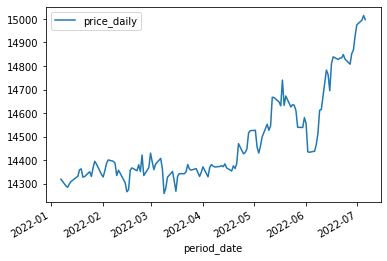

In [17]:
df.plot();

From the website we get data exchange rate movements from the period 07-01-2022 to 05-07-2022, for the highest exchange rate between IDR and USD on **05-07-2022** at **15014.65 IDR** while the lowest price is on **09-03-2022** at **14257.95 IDR**.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.